In [1]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
df = pd.read_csv("presiden.csv", encoding = "ISO-8859-1")
df.head()

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,0,Mon Mar 27 23:59:28 +0000 2023,1640503837101522944,@RomeoWalker19 lhah yang nolak juga ada den Ga...,0,0,0,1,in,1168755491524079616,1640261514329481216,jogja_menyapa,https://twitter.com/jogja_menyapa/status/16405...
1,1,Mon Mar 27 23:57:14 +0000 2023,1640503275157090304,@TukangRitwiit @ak03l @ch_chotimah2 @erickthoh...,0,0,0,0,in,984748161980817409,1640194507663872001,Anaksemut4,https://twitter.com/Anaksemut4/status/16405032...
2,2,Mon Mar 27 23:55:19 +0000 2023,1640502791746772994,@SantorinisSun Koster tidak mencalonkan diri j...,0,0,0,0,in,1564104932436848640,1640314739229339648,wongbojong1,https://twitter.com/wongbojong1/status/1640502...
3,3,Mon Mar 27 23:54:13 +0000 2023,1640502515862220800,"@Android_AK_47 Ganjar, tetep Ganjar",0,0,0,0,in,1313713962991591425,1640481747896008704,BapakePaki,https://twitter.com/BapakePaki/status/16405025...
4,4,Mon Mar 27 23:52:19 +0000 2023,1640502038919536641,"@Tita83079013 @ganjarpranowo Sangat dilema,pil...",0,5,1,7,in,1347675703316078593,1640230929993195523,TompulS5,https://twitter.com/TompulS5/status/1640502038...


In [3]:
df_text = df[['full_text']]
df_text.head()

,full_text
0,@RomeoWalker19 lhah yang nolak juga ada den Ga...
1,@TukangRitwiit @ak03l @ch_chotimah2 @erickthoh...
2,@SantorinisSun Koster tidak mencalonkan diri j...
3,"@Android_AK_47 Ganjar, tetep Ganjar"
4,"@Tita83079013 @ganjarpranowo Sangat dilema,pil..."


In [4]:
text = " ".join(review for review in df_text.full_text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 39492 words in the combination of all review.


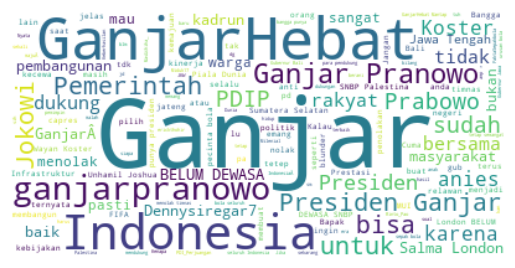

In [5]:

stopwords = set(STOPWORDS)
stopwords.update(["ada", "yang", "dan", "trus", "sama","yg","https","ga","di","dari","itu","yg","dgn","dalam","kalo","klo","kali","karna","kayak","kayanya","kayaknya","ka","kaya","udah","udh","ud","gak","gk","ga","nya","aja","aja","israel","pak","ya","dia","t","co","com","www","http","twitter","pic","pic.twitter","pic.twitter.com","ch_chotimah2","apa","tapi","saya","salma"
                  "1","2","3","4","5","6","7","8","9","0","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","ini","kita","adalah","lebih","jadi","ke","ð","a","u","lagi","banyak","akan","dengan","juga",
                  "â"])

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


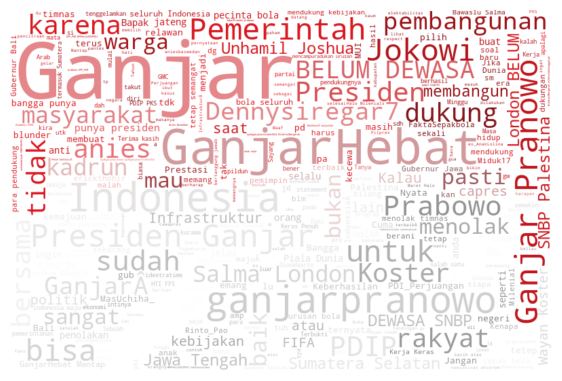

In [52]:

mask = np.array(Image.open("id2.jpg"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.savefig("WCID_FLAG.png")

plt.show()

In [43]:
wine_mask = np.array(Image.open("wine2.png"))
wine_mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [44]:
def transform_format(val):
    if np.any(val == 0):
        return 255
    else:
        return val

# Apply the transformation using vectorized operations
transformed_wine_mask = np.vectorize(transform_format)(wine_mask)

# If necessary, convert the result to the desired data type
transformed_wine_mask = transformed_wine_mask.astype(np.int32)


In [46]:
transformed_wine_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

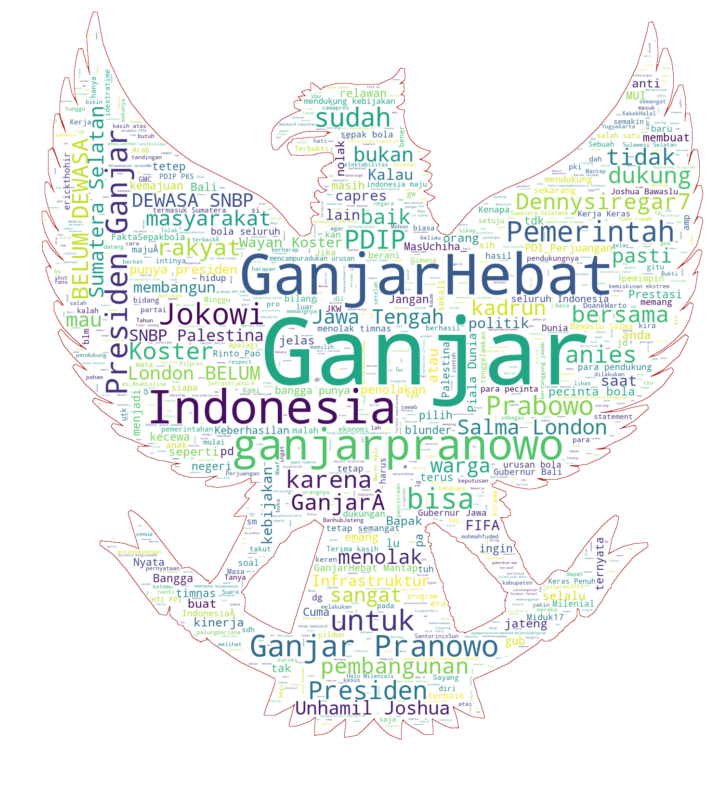

In [51]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=1, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("WC_Garuda.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()